<a href="https://colab.research.google.com/github/mohsenSarvariHero/PythonFirst/blob/main/Q10_HW4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kolmogorov-Smirnov Statistic (Dn): 0.1200
Critical Value: 0.1109
Reject the null hypothesis: The distributions are different.


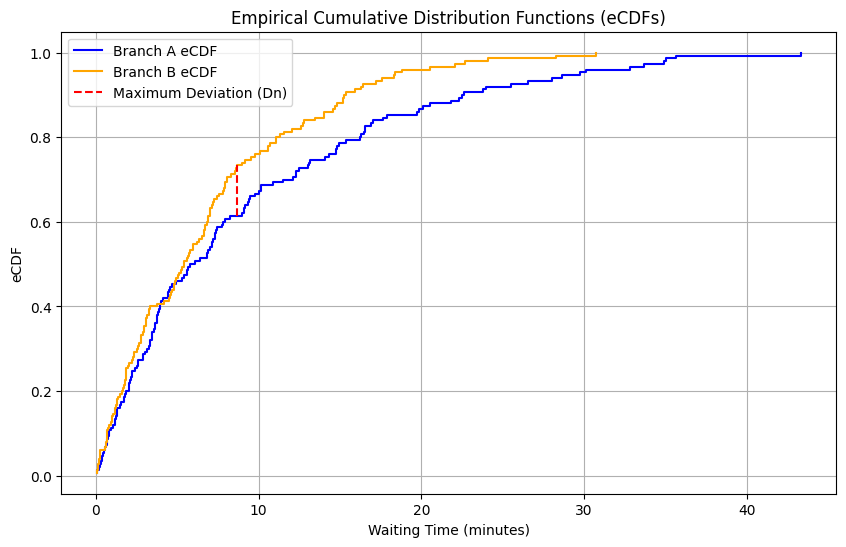

In [1]:
import numpy as np
from scipy.stats import ks_2samp, kstwobign
import matplotlib.pyplot as plt

# (a) Simulate two datasets
np.random.seed(42)
n_customers = 150
lambda_a = 0.1  # Rate parameter for Branch A
lambda_b = 0.15  # Rate parameter for Branch B

branch_a = np.random.exponential(1 / lambda_a, n_customers)
branch_b = np.random.exponential(1 / lambda_b, n_customers)

# (b) Compute empirical CDFs
def compute_ecdf(data):
    """
    Compute the empirical cumulative distribution function (eCDF).
    """
    sorted_data = np.sort(data)
    n = len(data)
    y = np.arange(1, n + 1) / n
    return sorted_data, y

x_a, y_a = compute_ecdf(branch_a)
x_b, y_b = compute_ecdf(branch_b)

# Combine data to calculate the maximum deviation
combined_data = np.sort(np.concatenate([branch_a, branch_b]))
ecdf_a = np.searchsorted(x_a, combined_data, side='right') / len(branch_a)
ecdf_b = np.searchsorted(x_b, combined_data, side='right') / len(branch_b)

# (c) Compute Kolmogorov-Smirnov statistic
Dn = np.max(np.abs(ecdf_a - ecdf_b))
print(f"Kolmogorov-Smirnov Statistic (Dn): {Dn:.4f}")

# Critical value at alpha = 0.05
alpha = 0.05
critical_value = np.sqrt(-0.5 * np.log(alpha / 2)) / np.sqrt(n_customers)
print(f"Critical Value: {critical_value:.4f}")

if Dn > critical_value:
    print("Reject the null hypothesis: The distributions are different.")
else:
    print("Fail to reject the null hypothesis: The distributions are the same.")

# (d) Visualize CDFs and highlight maximum deviation
plt.figure(figsize=(10, 6))
plt.step(x_a, y_a, where="post", label="Branch A eCDF", color="blue")
plt.step(x_b, y_b, where="post", label="Branch B eCDF", color="orange")
plt.vlines(combined_data[np.argmax(np.abs(ecdf_a - ecdf_b))],
           ecdf_a[np.argmax(np.abs(ecdf_a - ecdf_b))],
           ecdf_b[np.argmax(np.abs(ecdf_a - ecdf_b))],
           color='red', linestyle='--', label='Maximum Deviation (Dn)')
plt.title("Empirical Cumulative Distribution Functions (eCDFs)")
plt.xlabel("Waiting Time (minutes)")
plt.ylabel("eCDF")
plt.legend()
plt.grid()
plt.show()
